In [4]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


In [5]:
import random 
random.seed(0)

import warnings 
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cv2
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.optimizers import RMSprop, Adam

In [6]:
images = np.load('/content/mydrive/MyDrive/project CNN/images.npy')
labels = pd.read_csv('/content/mydrive/MyDrive/project CNN/Labels.csv')
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [7]:
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

Label 
 Label Name: Scentless Mayweed


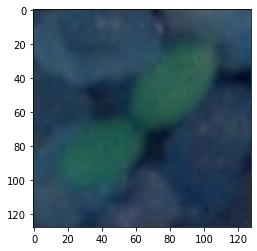

Label 
 Label Name: Sugar beet


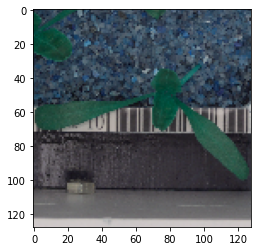

Label 
 Label Name: Small-flowered Cranesbill


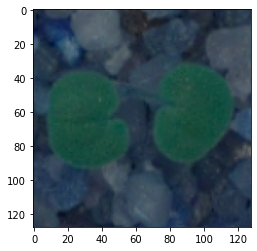

In [8]:

for i in range(3):
  i  = random.randint(0,len(labels))
  image = images[i]
  label = labels['Label'][i]
  #print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
  print(f'Label \n Label Name: {label}')
  plt.imshow(image);
  plt.show()

In [9]:
#normalization
scaledImages = images * 1/255

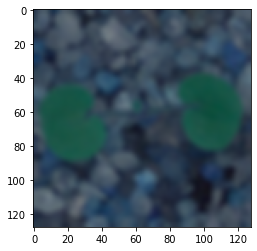

In [10]:
gblur = cv2.GaussianBlur(scaledImages[0], (5,5), 2)
plt.imshow(gblur)

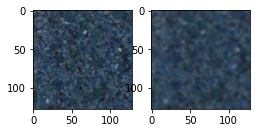

In [11]:
preprocessed_images = [cv2.GaussianBlur(x, (5,5), 2) for x in scaledImages]

plt.subplot(1, 3, 1); plt.imshow(scaledImages[-1])         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(preprocessed_images[-1])     # Blur image

preprocessed_images = np.asarray(preprocessed_images)  



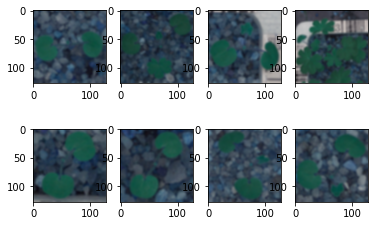

In [12]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_images[i])

In [13]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [14]:
from sklearn.model_selection import train_test_split

random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=random_seed)


X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(Y_val.shape)


(3325, 128, 128, 3)
(3325, 12)
(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


In [15]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [16]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit( x=X_train, y=y_train, batch_size=64, epochs=40, validation_data=(X_val,Y_val))

Epoch 1/40
52/52 [==============================] - 209s 4s/step - loss: 6.7037 - accuracy: 0.1140 - val_loss: 2.5404 - val_accuracy: 0.0575
Epoch 2/40
52/52 [==============================] - 209s 4s/step - loss: 2.2251 - accuracy: 0.2526 - val_loss: 2.6080 - val_accuracy: 0.1164
Epoch 3/40
52/52 [==============================] - 209s 4s/step - loss: 2.0441 - accuracy: 0.2815 - val_loss: 2.9021 - val_accuracy: 0.1346
Epoch 4/40
52/52 [==============================] - 209s 4s/step - loss: 1.8176 - accuracy: 0.3678 - val_loss: 3.0058 - val_accuracy: 0.1346
Epoch 5/40
52/52 [==============================] - 209s 4s/step - loss: 1.5972 - accuracy: 0.4358 - val_loss: 3.2456 - val_accuracy: 0.1374
Epoch 6/40
52/52 [==============================] - 209s 4s/step - loss: 1.4637 - accuracy: 0.5019 - val_loss: 2.9568 - val_accuracy: 0.1515
Epoch 7/40
52/52 [==============================] - 209s 4s/step - loss: 1.3989 - accuracy: 0.5310 - val_loss: 3.0117 - val_accuracy: 0.1781
Epoch 8/40
52

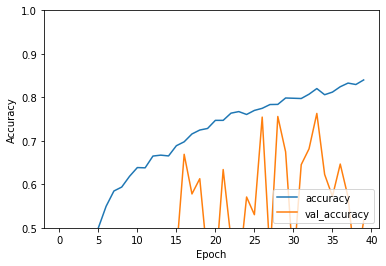

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

In [19]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4370553493499756
Test accuracy: 0.49719101190567017


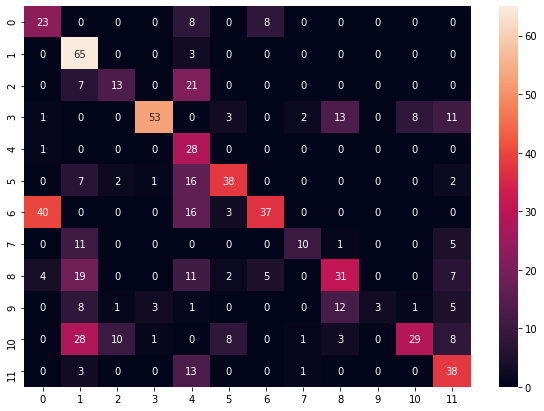

In [20]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');